<a href="https://colab.research.google.com/github/patty0324/Home_Pricing_analysis/blob/main/House%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
##This command follow as to read the Data from the folder you are gonna upload
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


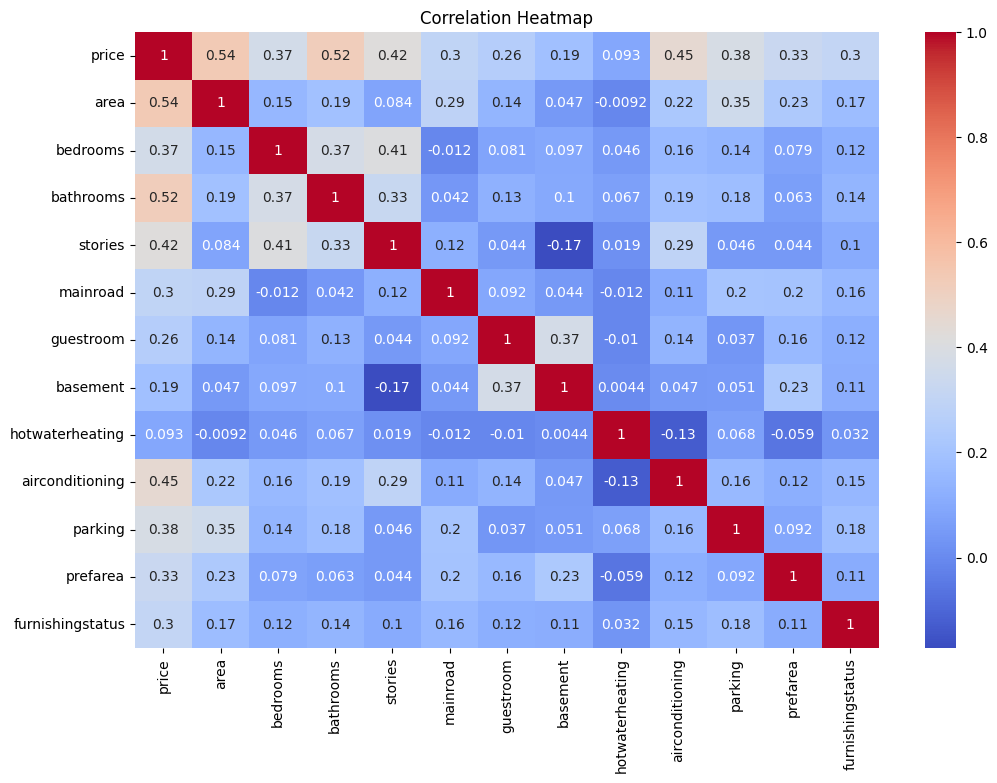

In [5]:
# Convert relevant columns to numeric type before calculating correlation
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Visualizing correlations with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Handling missing data
print(data.isnull().sum())  # Check for missing values

# Select only numeric columns before filling missing values
numeric_data = data.select_dtypes(include=['number'])
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Update the original DataFrame with filled values
data[numeric_data.columns] = numeric_data

# One-Hot Encoding for categorical features
data = pd.get_dummies(data)

# Feature and target selection
X = data.drop('price', axis=1)  # Replace 'target_column' with the actual column name
y = data['price']

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [21]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


R2 Score: 0.6494754192267792
Mean Squared Error: 1771751116594.041
Root Mean Squared Error: 1331071.4167895128


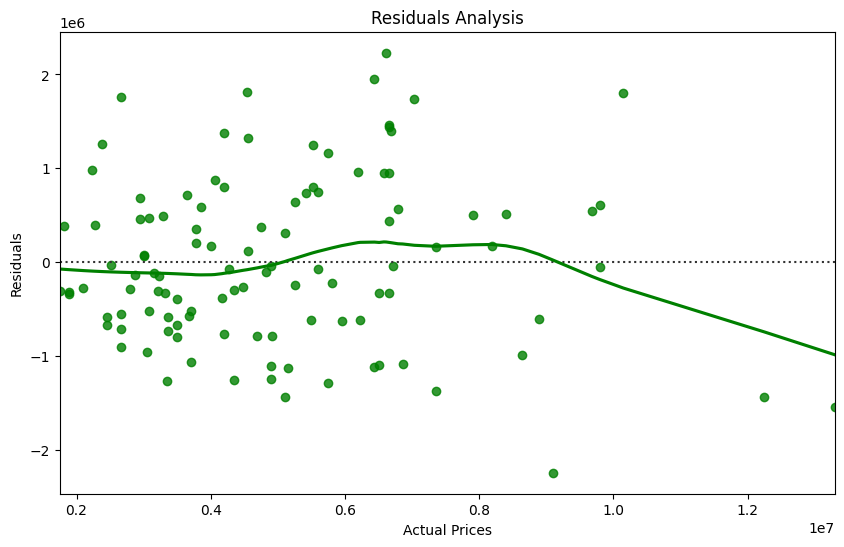

In [22]:
# Plotting residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='g')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Analysis')
plt.show()


In [23]:
# Save the model for future use
import pickle
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [16]:
# Load the model from the file
with open('house_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict using the loaded model
sample_data = X_test[0].reshape(1, -1)  # Replace with your actual sample data
sample_prediction = loaded_model.predict(sample_data)
print(f'Sample Prediction: {sample_prediction}')


Sample Prediction: [1.46272126]
